# Graphical Statistics:

In [1]:
import pandas as pd

from matplotlib import pylab as plt
import seaborn as sns  #seaborn is a library producing nicer plots than matplotlib
import scipy as sp

# $\underline{Boxplots:}$

In [2]:
#In the same file where you have created your notebook, you need to upload the file 'longAttitude.txt'
df_attitude = pd.read_table('data/longAttitude.txt') 
# We use read_table() rather than read_csv() because the file is a table in the txt format. 
# This function returns a pandas dataframe
df_attitude.head()
# head() returns the first 5 rows of the dataframe

,participant,groups,attitude,drink,imagery
0,P1,beerpos,1,Beer,Positive
1,P2,beerpos,43,Beer,Positive
2,P3,beerpos,15,Beer,Positive
3,P4,beerpos,40,Beer,Positive
4,P5,beerpos,8,Beer,Positive


In [3]:
df_attitude.describe()
# describe() returns some basic statitics of the numerical columns of the dataframe 

,attitude
count,180.000000
mean,7.894444
std,15.374468
min,-23.000000
25%,-5.000000
50%,8.000000
75%,20.000000
max,43.000000


C:\Users\rahimi\AppData\Local\Temp\ipykernel_18424\3956217500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="imagery", y="attitude", data=df_attitude, palette="Set3");


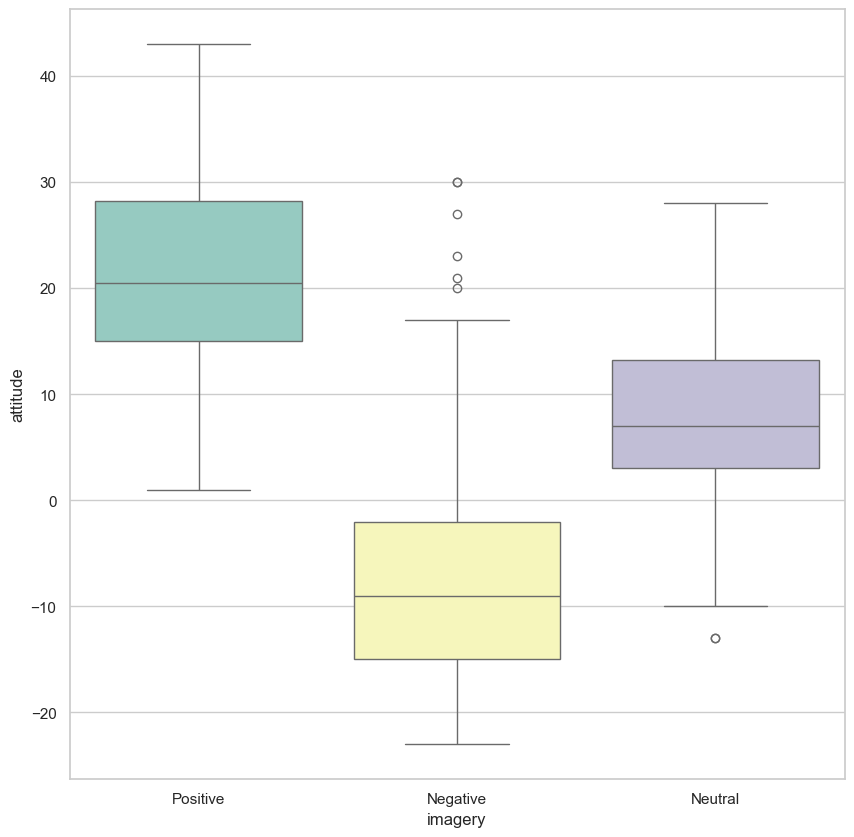

In [4]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x="imagery", y="attitude", data=df_attitude, palette="Set3");

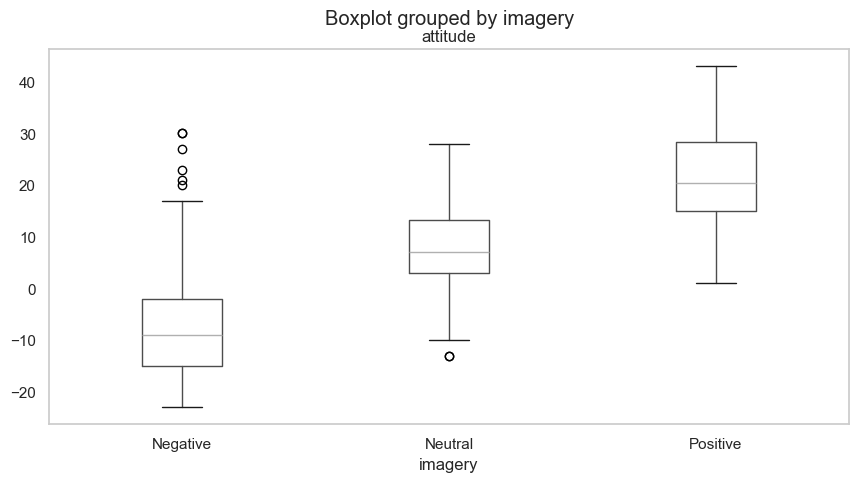

In [5]:
# use built in pandas plotting function
df_attitude.boxplot(column="attitude", by="imagery", figsize=(10, 5), grid=False);

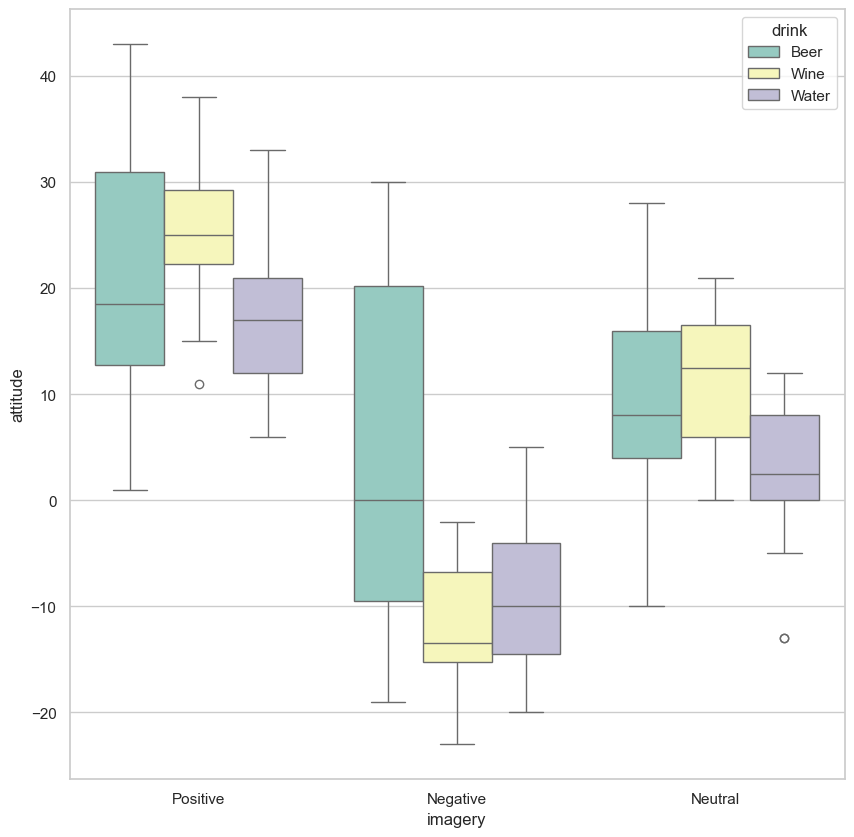

In [6]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x="imagery", y="attitude",hue='drink', data=df_attitude, palette="Set3")
# The parameter hue is useful to get more detailed boxplots. Here we condition on imagery...

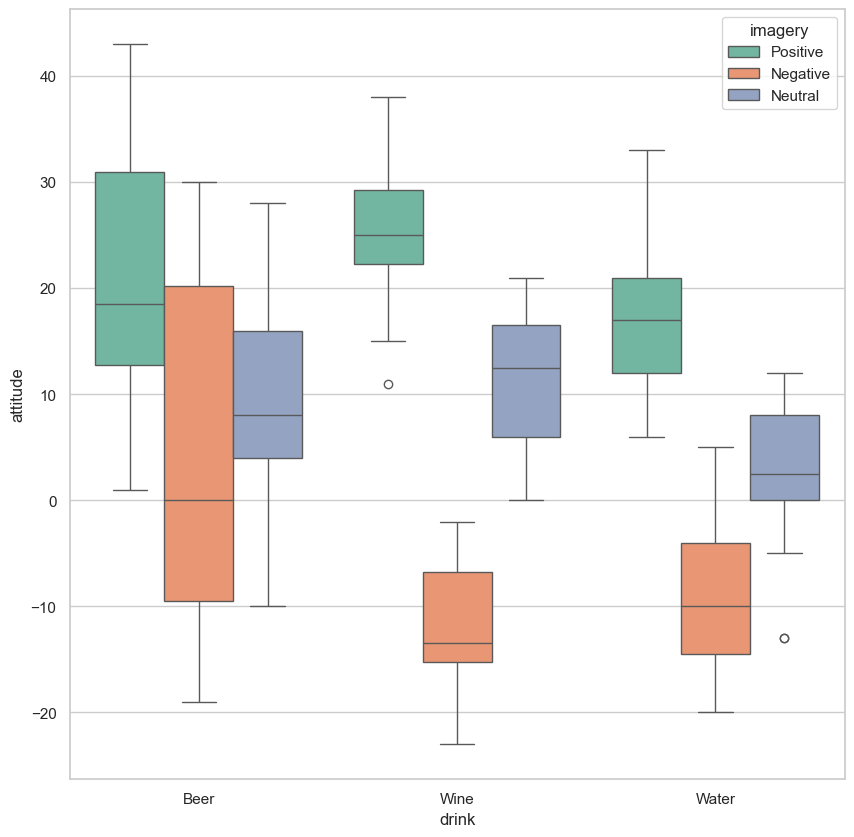

In [7]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x="drink", y="attitude", hue="imagery", data=df_attitude, palette="Set2",orient='v')
# Parameter orient returns horizontal boxplots.

# $\underline{QQ-plots:}$

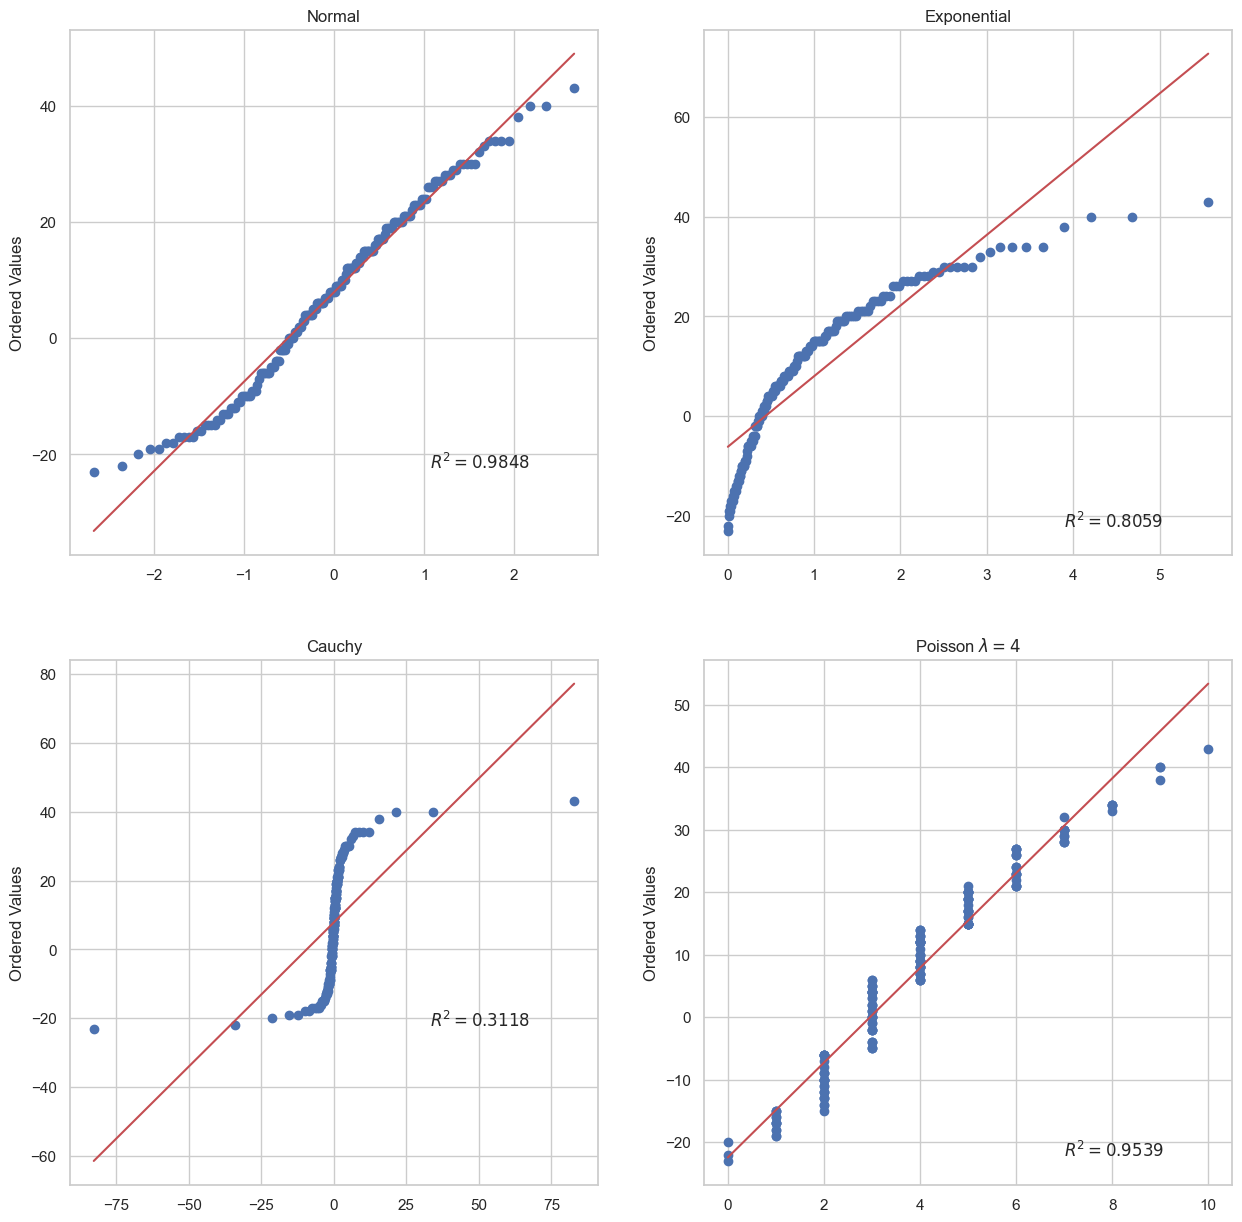

In [8]:
f, ax = plt.subplots(2,2, figsize=(15, 15))
QQ_plot = sp.stats.probplot(
    df_attitude["attitude"], dist="norm", plot=ax[0,0], fit=True, rvalue=True
    )
ax[0,0].set_title("Normal")
ax[0,0].set_xlabel("")

# probplot if a function returning a QQ_plot.
# Parameter dist corresponds to the theoretical quantiles. Here norm is the normal distibution.
QQ_plot = sp.stats.probplot(
    df_attitude["attitude"], dist="expon", plot=ax[0,1], fit=True, rvalue=True
    )

ax[0,1].set_title("Exponential")
ax[0,1].set_xlabel("")
QQ_plot = sp.stats.probplot(
    df_attitude["attitude"], dist="cauchy", plot=ax[1,0], fit=True, rvalue=True
    )
ax[1,0].set_title("Cauchy")
ax[1,0].set_xlabel("")

QQ_plot = sp.stats.probplot(
    df_attitude["attitude"], dist="poisson", sparams=4, plot=ax[1,1], fit=True, rvalue=True
    )
ax[1,1].set_title("Poisson $\lambda=4$")
ax[1,1].set_xlabel("");

## Question:
Interpret the previous plot and repeat the same experience with Cauchy and Exponential distributions.
The data distribution can be assumed to be a normal distribution, because it fit best that in comparaison with the the others 3 distributions

# $\underline{Correlation:}$


In [9]:
#In the same file where you have created your notebook, you need to upload the file 'regression.csv'
df_regression = pd.read_csv('data/regression.csv',sep=';') #Always check the parameter sep when you upload your file.
df_regression.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,18.224967,1.028992,0.622963,0.278925,-0.405870,0.958563,-1.133672,-0.563239,1.096962,0.420335,0.911695
1,3.132315,0.604380,1.639447,1.121144,-0.012976,-0.000129,1.603966,-0.074142,-1.036641,-0.451208,-0.225835
2,-19.514408,-0.634519,0.093021,0.328398,-1.333980,-0.419870,-0.094647,-2.369584,0.859509,-0.310185,-0.101982
3,5.158179,0.383733,-1.258306,0.955069,-0.094585,-0.337204,2.054539,-1.423585,1.220261,0.186976,-0.763621
4,21.181815,0.770505,-0.464247,0.066713,1.035105,1.780473,0.563849,0.519628,0.594002,-0.948932,0.258373


In [10]:
df_regression.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.866200,0.106671,-0.011075,-0.086213,0.038583,-0.050792,0.015825,-0.043500,0.173027,0.087058,-0.074963
std,20.074693,0.921415,1.062198,0.950419,1.043892,1.001846,0.947679,1.124056,1.045453,1.144422,0.958011
min,-45.808989,-2.512208,-2.968668,-2.256096,-3.203029,-3.216962,-2.512321,-2.369584,-2.355831,-2.514274,-1.867200
25%,-13.051100,-0.466962,-0.689689,-0.774844,-0.638126,-0.734253,-0.624637,-0.928095,-0.409013,-0.553699,-0.799714
50%,0.150683,0.120781,-0.069093,0.061547,0.069334,-0.138532,0.002869,-0.084932,0.155664,0.032969,-0.000804
75%,18.092876,0.764207,0.619910,0.641472,0.785483,0.695117,0.614173,0.737215,0.912155,0.720052,0.589996
max,52.001064,2.057226,2.456924,1.549438,1.817392,2.447484,2.317906,2.622487,2.557162,3.077316,1.789637


In [11]:
df_regression.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
V1,1.000000,0.072551,-0.052552,-0.063109,0.167757,0.287429,0.199495,0.489912,0.318498,0.531266,0.523736
V2,0.072551,1.000000,-0.153330,-0.019835,-0.048115,-0.046274,0.116381,-0.057304,-0.067867,0.135425,0.035146
V3,-0.052552,-0.153330,1.000000,-0.181632,0.160548,0.055728,-0.012258,-0.150403,-0.061683,-0.218303,0.051199
V4,-0.063109,-0.019835,-0.181632,1.000000,0.178020,-0.060489,-0.122038,-0.088700,-0.050094,-0.043989,-0.196777
V5,0.167757,-0.048115,0.160548,0.178020,1.000000,0.058539,-0.050689,0.036185,-0.233063,0.032803,-0.012145
V6,0.287429,-0.046274,0.055728,-0.060489,0.058539,1.000000,-0.264509,-0.072025,0.204513,0.074114,0.012075
V7,0.199495,0.116381,-0.012258,-0.122038,-0.050689,-0.264509,1.000000,0.181287,-0.112315,0.078157,-0.119209
V8,0.489912,-0.057304,-0.150403,-0.088700,0.036185,-0.072025,0.181287,1.000000,-0.023787,0.043716,0.176061
V9,0.318498,-0.067867,-0.061683,-0.050094,-0.233063,0.204513,-0.112315,-0.023787,1.000000,-0.100084,0.011072
V10,0.531266,0.135425,-0.218303,-0.043989,0.032803,0.074114,0.078157,0.043716,-0.100084,1.000000,0.042817


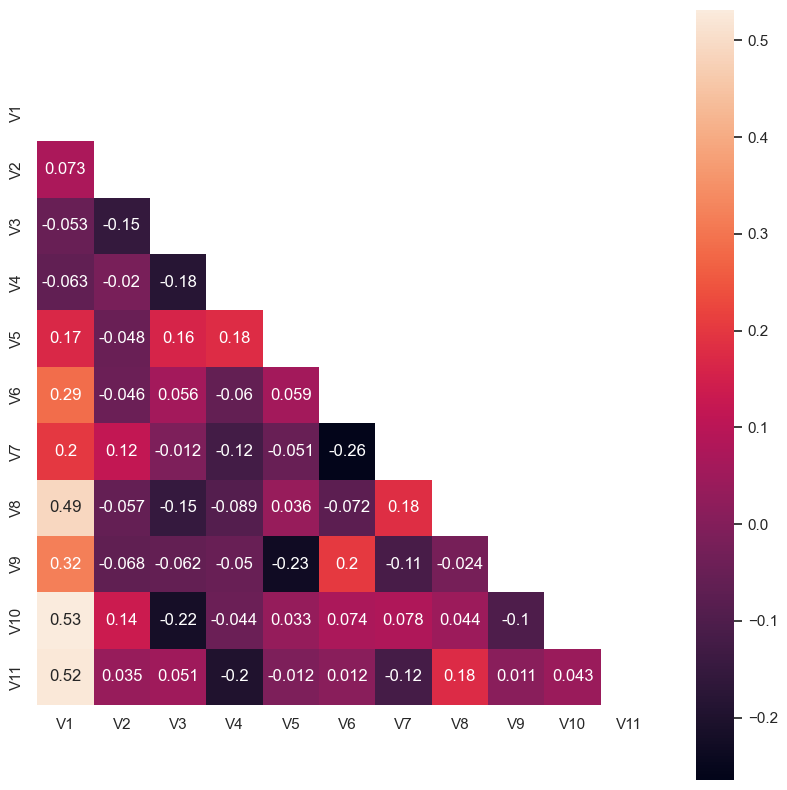

In [12]:
import numpy as np
corr = df_regression.corr()
mask = np.zeros_like(corr)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(df_regression.corr(),mask=mask, square=True, annot=True)

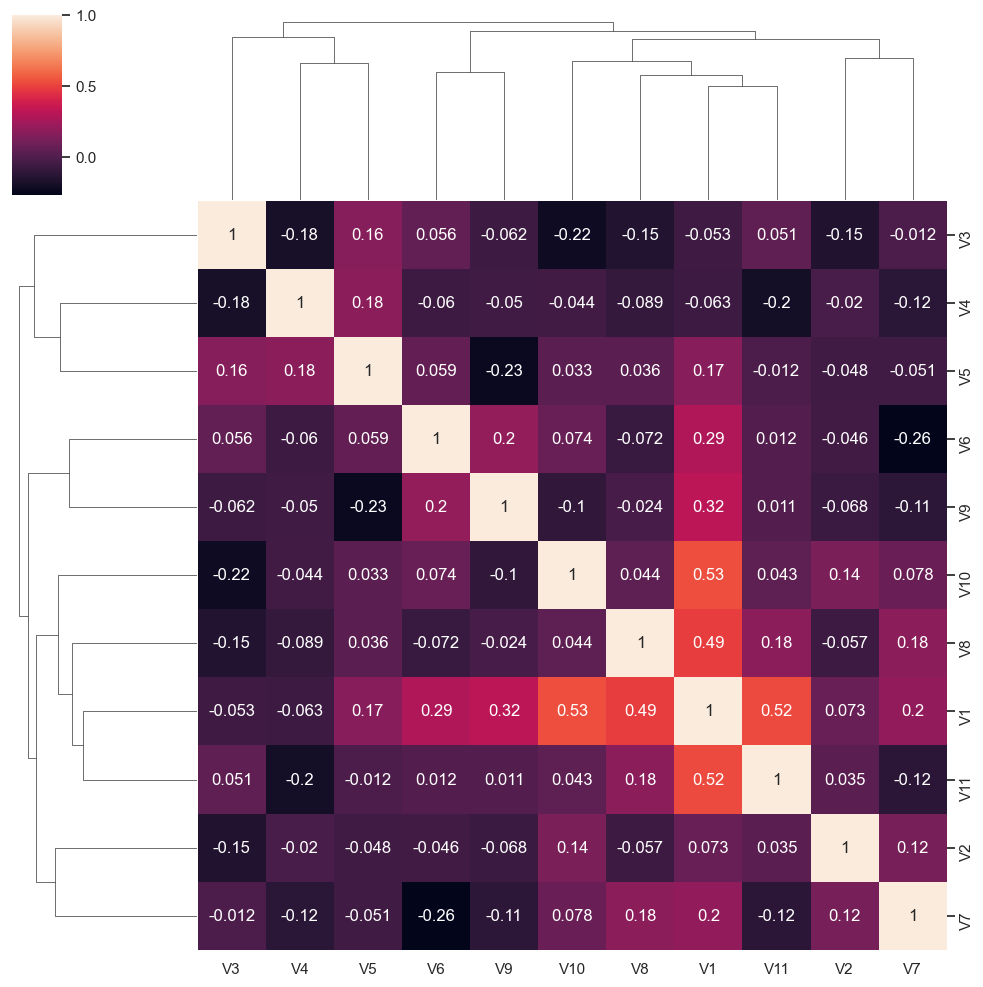

In [15]:
# plot heatmap with hirachal clusting
sns.clustermap(df_regression.corr(), annot=True);